<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool10_DataAnalysis/blob/main/DATA08_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터전처리

>## 1) 시계열 데이터의 결측치 문제 해결

>>### (1) 시계열 데이터 특징
>>- 시간의존성 : 시간의 흐름에 따라 관측치 간 상관관계 가능성
>>- 계절성 : 일정한 주기에 따른 일정한 패턴 반복
>>- 추세 : 장기적인 추세

>>### (2) 결측치
>>- 시계열 데이터에서 흔히 발생하는 문제
>>- 데이터 누락 / 기록되지 않음을 의미
>>- 데이터분석, 예측에 부정적 영향 가능성
>>- 데이터 왜곡, 모델의 부정확성 야기 가능
>>- 결측치 처리방법 : 데이터의 특정, 분석목적에 따라 다양함

>>### (3) 결측치 처리의 중요성 
>>- 데이터 왜곡 방지
>>- 예측 정확도 향상
>>- 유의미한 데이터분석

>## 2) 데이터 결측치 위치 확인 방법
>- 데이터세 요약정보 확인 : info(), describe() 메서드로 확인가능
>- 시각화 : 히트맵, 누락데이터플롯 사용해서 확인가능
>- 조건식 필터링 : pandas의 isnull(), isna() 메서드로 셀이 결측치인지 확인
>- 결측치 개수 확인 : pandas의 isnull().sum() 메서드로 확인가능

>>### (1) 결측치 위치확인 - 조건식 필터링(isnull)
>>- true 부분이 결측치임

In [1]:
import pandas as pd
import numpy as np

#예시 데이터셋 생성
data = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                     'B': [6, np.nan, 8, 9, 10],
                     'C': [11, 12, 13, np.nan, 15]})

#결측치 위치 확인
print(data.isnull())

       A      B      C
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True
4  False  False  False


>>### (2) 결측치 위치확인 - 히트맵시각화
>>- 노란색이 결측치 위치

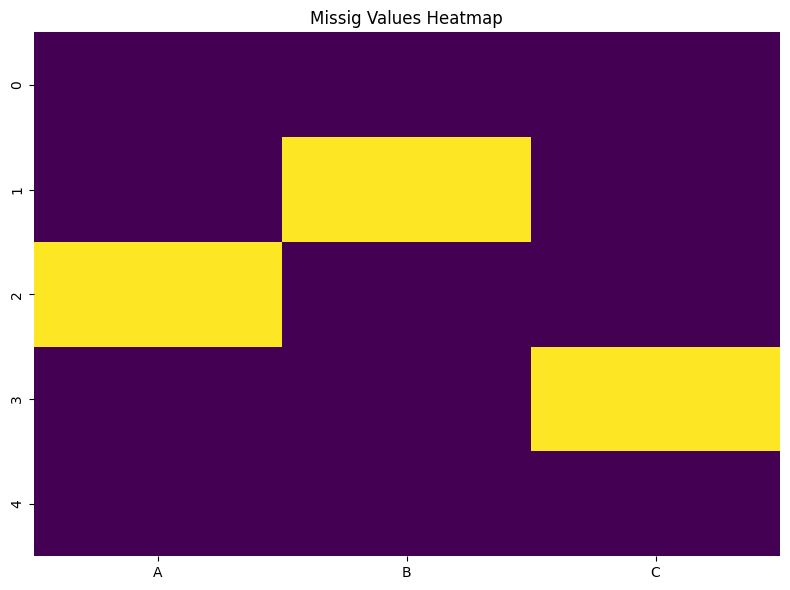

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#예시 데이터셋 생성
data = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                     'B': [6, np.nan, 8, 9, 10],
                     'C': [11, 12, 13, np.nan, 15]})

#결측치 위치 확인 위한 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missig Values Heatmap')

plt.tight_layout()
plt.show()

>>### (3) 결측치 위치확인 - 개수확인방법

In [5]:
import pandas as pd

#예시 데이터셋 생성
data = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                     'B': [6, np.nan, 8, 9, 10],
                     'C': [11, 12, 13, np.nan, 15]})

#결측치 개수확인
missing_count = data.isnull().sum()
print(missing_count)

A    1
B    1
C    1
dtype: int64


>## 3) 결측치 빈도 및 패턴 분석방법
>- 결측치 처리 전략 수립을 위한 과정
>- 결측치 처리갯수확인 : 결측치가 얼마나 존재하는지 확인 
>- 결측치 위치확인 : 결측치가 특정 패턴가지는지 파악 
>- 시각화 : 결측치를 시각적으로 표현하여 데이터셋 패턴 확인 가능
>- 시계열분석 : 자기상관함수(ACF) 통해 결측치 패턴을 시계열 분석 기법 통해 분석 가능

>## 4) 결측치 삭제 (시계열데이터)
>- 결측치가 있는 행/열 삭제하기
>- 결측치 행 삭제 : 해당 시간 인덱스 데이터 삭제
>- 결측치 열 삭제 : 해당 변수(열)의 데이터 제거(변수가 중요하지 않거나, 결측치 비율 매우 높을때 사용)

>>### (1) 결측치 있는 행 삭제 실습

In [7]:
import pandas as pd
import numpy as np

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)

#결측치 생성
values[10] = np.nan

#데이터프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})
print(data)

#결측치 생성 여부 체크
row_11 = data.iloc[10]
print(row_11)

         Date     Value
0  2023-01-01  0.496714
1  2023-01-02 -0.138264
2  2023-01-03  0.647689
3  2023-01-04  1.523030
4  2023-01-05 -0.234153
..        ...       ...
95 2023-04-06 -1.463515
96 2023-04-07  0.296120
97 2023-04-08  0.261055
98 2023-04-09  0.005113
99 2023-04-10 -0.234587

[100 rows x 2 columns]
Date     2023-01-11 00:00:00
Value                    NaN
Name: 10, dtype: object


In [8]:
#결측치 개수 확인 체크
print("결측치 개수:")
print(data.isnull().sum())

결측치 개수:
Date     0
Value    1
dtype: int64


In [9]:
#결측치가 있는 행 삭제
data_without_missing = data.dropna(axis=0)

#결측치 삭제 후 결과 확인
print("결측치 제거된 데이터:")
print(data_without_missing)

결측치 제거된 데이터:
         Date     Value
0  2023-01-01  0.496714
1  2023-01-02 -0.138264
2  2023-01-03  0.647689
3  2023-01-04  1.523030
4  2023-01-05 -0.234153
..        ...       ...
95 2023-04-06 -1.463515
96 2023-04-07  0.296120
97 2023-04-08  0.261055
98 2023-04-09  0.005113
99 2023-04-10 -0.234587

[99 rows x 2 columns]


>>### (2) 결측치 삭제 장점
>>- 간단하고 직관적으로 결측치 처리가능
>>- 시계열 데이터 특성 유지하면서 결측치 삭제가능
>>- 결측치 있는 행 삭제하면 시간적 흐름 유지가능

>>### (3) 결측치 삭제 단점
>>- 데이터 손실 발생 (시계열 데이터 완전성 저하)
>>- 결측치 많은 경우 데이터넷 크기 축소되어 모델링, 분석에 필요한 데이터크기 확보 어려움
>>- 해당 시점의 데이터 패턴 및 특성 파악 하기 어려움

>>### (4) 결측치 삭제 적용 사례 소개
>>- 결측치 적거나 다른 변수와 상관관계 적은 경우 사용
>>- 시계열 데이터에서는 특정 시간 범위 내 결측치 집중적으로 발생하는 경우 해당 시간 범위 삭제하면 간단함 
>>- 시간적 연속성 중요한 경우 데이터 일관성 유지 가능

---

# 2. 결측치 대체 방법1 - 보간

>## 1) 선형보간 
>- 결측치를 선형적으로 보간하는 방법
>- 시계열 데이터에서 결측치 대체하는 일반적인 방법
>- 인접한 데이터 포인트 사이를 직선으로 연결하여 결측치 채우는 방식으로 동작

>>### (1) 선형보간 원리 및 활요사례
>>- 데이터의 경향성 이용하여 대체
>>- 데이터의 추세, 패턴 유지하는 경향
>>- 간단하고 계산이 빠름
>>- 시계열 데이터 결측치 대체에 널리 사용되는 방법
>>- 선형적인 특성으로, 실제 데이터의 특성과 부합하지 않을 수 있음
>>- 일일 기온 데이터 결측치 보완

>>### (2) 선형보간 - pandas를 이용한 실습

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데ㅣ터 생성
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
values = [1, np.nan, 3, np.nan, 5, 6, np.nan, 8, 9, np.nan]

#데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})
print(data)

        Date  Value
0 2023-01-01    1.0
1 2023-01-02    NaN
2 2023-01-03    3.0
3 2023-01-04    NaN
4 2023-01-05    5.0
5 2023-01-06    6.0
6 2023-01-07    NaN
7 2023-01-08    8.0
8 2023-01-09    9.0
9 2023-01-10    NaN


        Date  Value  Value_linear
0 2023-01-01    1.0           1.0
1 2023-01-02    NaN           2.0
2 2023-01-03    3.0           3.0
3 2023-01-04    NaN           4.0
4 2023-01-05    5.0           5.0
5 2023-01-06    6.0           6.0
6 2023-01-07    NaN           7.0
7 2023-01-08    8.0           8.0
8 2023-01-09    9.0           9.0
9 2023-01-10    NaN           9.0


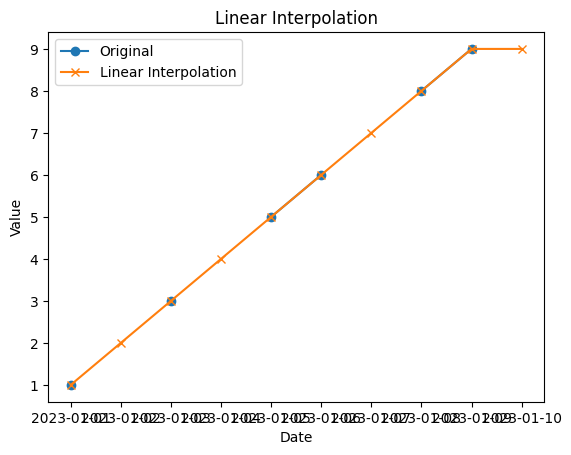

In [14]:
#선형보간 적용
data['Value_linear'] = data['Value'].interpolate(method='linear')
print(data)

#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_linear'], 'x-', label='Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Interpolation')
plt.legend()
plt.show()

>## 2) 스플라인 보간

>>### (1) 스플라인 보간 원리
>>- 주어진 데이터를 부드러운 곡선으로 근사화 하여 결측치 채움
>>- 다항식 / 조각적 다항식 함수 사용하여 결측치 추정
>>- 데이터셋이나 곡선 특징 잘 파악해야 하는 경우 사용
>>- 예시 : 데이터셋 크고 특징 파악해야 하는 경우 (경제지표 시계열 데이터 보완)

>>### (2) 스플라인 보간 실습

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

#시계열 데ㅣ터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#결측치 생성
data.loc[100:200, 'Value'] = np.nan

#결측치 생성 확인 체크
print(data.loc[100:200])

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


In [18]:
#스플라인 보간법 적용 : 결측치 제거 / 대체 작업 필요(결측치 처리)
data['Value_filled'] = data['Value'].interpolate(method='linear')
print(data.loc[100:200])

          Date  Value  Value_filed  Value_filled
100 2023-04-11    NaN    -0.226789     -0.226789
101 2023-04-12    NaN    -0.218992     -0.218992
102 2023-04-13    NaN    -0.211194     -0.211194
103 2023-04-14    NaN    -0.203396     -0.203396
104 2023-04-15    NaN    -0.195598     -0.195598
..         ...    ...          ...           ...
196 2023-07-16    NaN     0.521796      0.521796
197 2023-07-17    NaN     0.529593      0.529593
198 2023-07-18    NaN     0.537391      0.537391
199 2023-07-19    NaN     0.545189      0.545189
200 2023-07-20    NaN     0.552987      0.552987

[101 rows x 4 columns]


In [19]:
#스플라인 보간법 적용
spl = CubicSpline(data.index, data['Value_filled'])
data['Value_spline'] = spl(data.index)
print(data.loc[100:200])

          Date  Value  Value_filed  Value_filled  Value_spline
100 2023-04-11    NaN    -0.226789     -0.226789     -0.226789
101 2023-04-12    NaN    -0.218992     -0.218992     -0.218992
102 2023-04-13    NaN    -0.211194     -0.211194     -0.211194
103 2023-04-14    NaN    -0.203396     -0.203396     -0.203396
104 2023-04-15    NaN    -0.195598     -0.195598     -0.195598
..         ...    ...          ...           ...           ...
196 2023-07-16    NaN     0.521796      0.521796      0.521796
197 2023-07-17    NaN     0.529593      0.529593      0.529593
198 2023-07-18    NaN     0.537391      0.537391      0.537391
199 2023-07-19    NaN     0.545189      0.545189      0.545189
200 2023-07-20    NaN     0.552987      0.552987      0.552987

[101 rows x 5 columns]


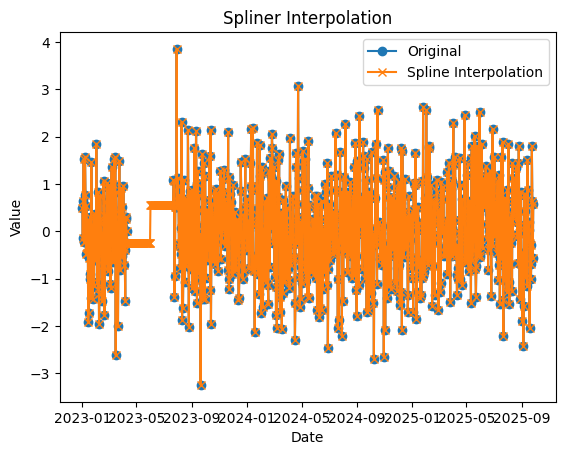

In [21]:
#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spliner Interpolation')
plt.legend()
plt.show()

>## 3) 최근접 이웃 보간

>>### (1) 최근접 이웃 보간 원리
>>- 결측치를 가장 가까운 이웃 값으로 대체
>>- 이산적인 데이터, 이상치에 민감하지 않을때 활용

>>### (2) 최근접 이웃 보간 실습

          Date  Value  Value_filled
100 2023-04-11    NaN     -0.234587
101 2023-04-12    NaN     -0.234587
102 2023-04-13    NaN     -0.234587
103 2023-04-14    NaN     -0.234587
104 2023-04-15    NaN     -0.234587
..         ...    ...           ...
196 2023-07-16    NaN      0.560785
197 2023-07-17    NaN      0.560785
198 2023-07-18    NaN      0.560785
199 2023-07-19    NaN      0.560785
200 2023-07-20    NaN      0.560785

[101 rows x 3 columns]


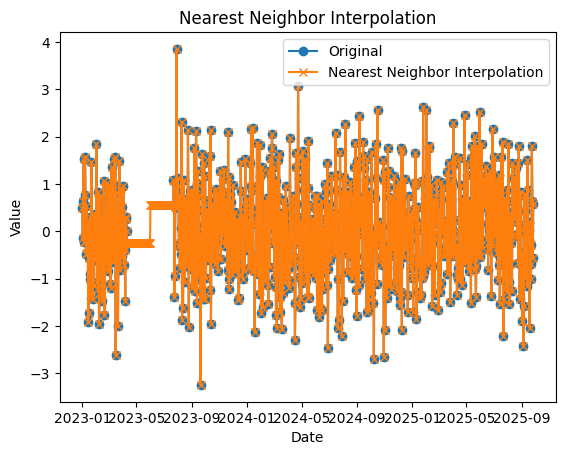

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데ㅣ터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#결측치 생성
data.loc[100:200, 'Value'] = np.nan

#최근접 이웃보간 적용(결측치처리)
data['Value_filled'] = data['Value'].interpolate(method='nearest')
print(data.loc[100:200])

#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()

# 3. 결측치 대체 방법2  - 대체


>## 1) 평균값 대체
>- 결측치를 해당 변수의 평균값으로 대체하는 방법
>- 변수의 분포 유지하면서 결측치 대체 가능

>## 2) 평균값 대체 장점
>>- 간편성 : 계산쉽고 대체과정이 간단함
>>- 데이터 중심경향 유지 : 변수의 중심경향 나타내어, 대체된 값이 중심 유지
>>- 표본편향감소 : 유효한 데이터 사용하여, 전체데이터셋 표본평향 줄일 수 있음

>## 3) 평균값 대체 한계
>>- 정보손실 : 해당 변수의 특정 관측치 정보 잃어버림
>>- 변동성 왜곡 : 중심값으로 데이터 변동성 감소할 수 있음
>>- 상관관계 왜곡 : 변수간 상관관계 고려하지 않기 때문에 발생

>## 4) 평균값 대체 실습

전체데이터 평균값  0.018624927427124387
          Date  Value  Value_filled
100 2023-04-11    NaN      0.018625
101 2023-04-12    NaN      0.018625
102 2023-04-13    NaN      0.018625
103 2023-04-14    NaN      0.018625
104 2023-04-15    NaN      0.018625
..         ...    ...           ...
196 2023-07-16    NaN      0.018625
197 2023-07-17    NaN      0.018625
198 2023-07-18    NaN      0.018625
199 2023-07-19    NaN      0.018625
200 2023-07-20    NaN      0.018625

[101 rows x 3 columns]


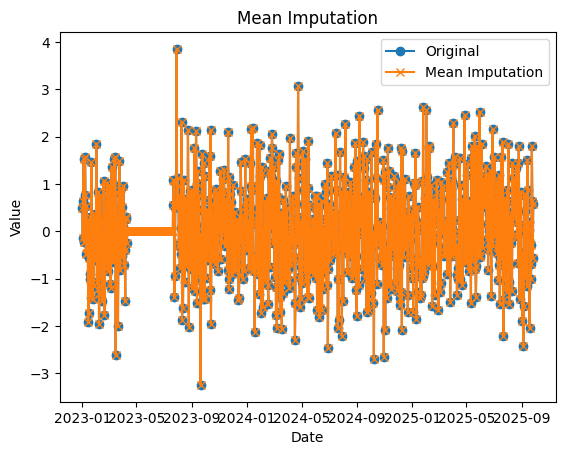

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#시계열 데ㅣ터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

#데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#결측치 생성
data.loc[100:200, 'Value'] = np.nan

#평균값 대처 적용(결측치처리)
mean_value = data['Value'].mean()
print("전체데이터 평균값 ", mean_value)
data['Value_filled'] = data['Value'].fillna(mean_value)
print(data.loc[100:200])

#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Mean Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mean Imputation')
plt.legend()
plt.show()

# 4. 결측치 대체 방법3 - 시계열 데이터 모델 활용

>## 1) 시계열 데이터 모델 활용한 결측치 예측 및 대처
>- 결측치 예측 모델 구축 : 시계열 데이터 패턴 파악, ARIMA, Prophet, LSTM 사용
>- 모델학습 : 결측치 없는 **데이터** 사용해서 훈련, 결측치 있는 데이터로 검증
>- 결측치 예측 : 학습된 모델 사용해 결측치 예측
>- 결측치 대체 : (2개 백업후)원본데이터 대체 / 불완전성 보완

>## 2) 시계열 모델 활용한 결측치 예측 및 대처의 장점 소개
>- 정확성 : 시계열 데이터 동적 특성 고려하여 결측치 예측 : 정확한 대체 가능
>- 시계열 데이터 특성 반영 : 데이터의 추세, 계절성, 주기 등의 패턴 고려하여 예측
>- 다양한 시계열 예측 모델 적용 가능, 모델의 성능 평가 및 선택 가능

>## 3) 시계열 모델 활용한 결측치 예측 및 대체에 대한 주의사항
>- 시계열 데이터 범위 신중한 선택 : 학습 데이터에 의존함, 예측범위 넘어선 시간대의 결측치 어려움
>- 시간적 의존성 존재 : 모델의 패턴 및 특성을 기반으로 예측
>- 결측치의 비율 높은 경우 모델 성능 저하될 수 있음
>- 예측결과에 대한 신뢰 구간 고려하여 대체 값을 결정하는 것이 중요함
>- 모델 선택 및 하이퍼파라미터 조정에 주의해야 함 (default로 돌려보고 그 뒤에 비교 모델/파라미터로 진행)

>## 4) 시계열 활용 대체 모델 - ARIMA 
>- ARIMA(자동회귀누적이동평균) : 시계열 데이터 패턴 파악하여 미래값 예측하는 모델

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


          Date  Value  Value_arima
100 2023-04-11    NaN    -0.103569
101 2023-04-12    NaN    -0.095798
102 2023-04-13    NaN    -0.083315
103 2023-04-14    NaN    -0.072096
104 2023-04-15    NaN    -0.088169
..         ...    ...          ...
196 2023-07-16    NaN    -0.028432
197 2023-07-17    NaN    -0.027400
198 2023-07-18    NaN    -0.022168
199 2023-07-19    NaN    -0.018897
200 2023-07-20    NaN    -0.025208

[101 rows x 3 columns]


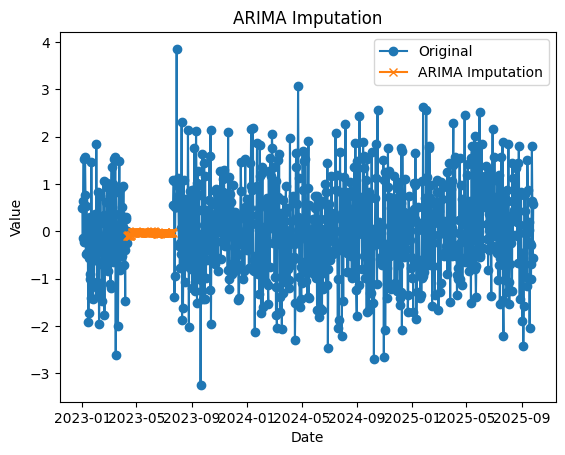

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
valutes = np.random.randn(1000)

#데이터프레임생성
data = pd.DataFrame({'Date':dates, 'Value':values})

#결측치생성
data.loc[100:200, 'Value'] = np.nan
print(data.loc[100:200])

#ARIMA 모델 
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
model_fit = model.fit()

#결측치 예측
predicted_values = model_fit.predict(start=100, end=2000)

#결측치 대체
data.loc[100:200, 'Value_arima']= predicted_values
print(data.loc[100:200])

#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_arima'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()

# 5. 결측치 처리 과정 주요사항

>## 1) 결측치 처리 전후 데이터 품질 평가방법
>- 결측치 비율 확인 : 결측치 비율 감소시 데이터 품질 향상된 것
>- 기술통계량 비교 : 통계량 크게 변하면 데이터 품질 유지되거나 향상된 것
>- 시각화 : 처리 후 데이터 더 부드러운 경우 데이터 품질 향상된 것
>- 예측성능평가 : 예측치 대체한 데이터 학습 후 테스트 데이터에 대한 예측 정확도, 평균제곱오차 평가후 향상시 데이터 품질이 향상된 것

>## 2) 결측치 처리과정에서 고려할 사항
>- 결측치 패턴 파악 : 결측치 분포도, 특정패턴 가지고 있는지 등
>- 데이터 특성 유지 : 결측치 처리방법 선택시 데이터 특성 유지
>- 적절한 대체 방법 선택
>- 모델 선택과 평가 : 오버피팅 방지 등을 위해서
>- 전체 데이터셋 고려 : 다른 변수와의 상관관계, 데이터 일관성 유지 등에 영향

>## 3) 결측치 처리 중요성 
>- 데이터 완성도 유지
>- 예측 모델의 성능 향상
>- 데이터 편향 방지

>## 4) 결측치 처리 응용 사례
>- 금융분석 : 주식시장 결측 데이터 처리 후 분석
>- 의료연구 
>- 고객분석
>- 기상예측
>- 자동화 및 제조분야